<a href="https://colab.research.google.com/github/jeevan97achar/housing_ML_project/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Sale Price of Houses

#### Downloading the dataset from Kaggle

In [1]:
! pip install -q kaggle


In [2]:
from google.colab import files

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2590         98  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1358         51  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5873        185  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [7]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 44.7MB/s]


In [8]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### Data Analysis

In [9]:
# To handle datasets
import pandas as pd
import numpy as np

import math 

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For Yeo-Johnson Transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [10]:
# loading the dataset
data = pd.read_csv('train.csv')

# check the rows and columns of the dataset
print(data.shape)

# visualize the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Dropping the Id column since it is just an id given to each house
data.drop(['Id'], inplace=True, axis=1)
print(data.shape)
data.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In this housing dataset "SalePrice" is the Target variable.

### Analysis
#### We will analyse the following:

1.   The target variable
2.   Variable types (categorical and numerical)
3.   Missing data
4.   Numerical variables
      *   Discrete
      *   Continuous
      *   Distributions
      *   Transformations
4.   Categorical variables
      *   Cardinality
      *   Rare Labels
      *   Special mappings
      *   Additional Reading Resources

### Target

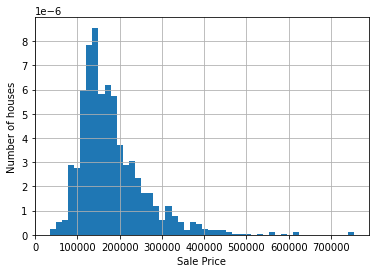

In [12]:
# Target variable exploration

# No. of bins can be tuned !!!

# Histogram to explore target distribution

data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

We can see that the target variable is skewed towards the right

It is a continous distribution

Need to improve the value spread with a mathematical transformation.

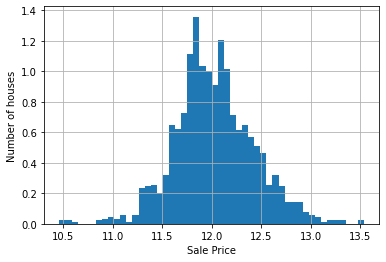

In [13]:
# Performing log transformation of the target variable

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()


## Variable types

Identifying numerical and categorical variables

In [14]:
# capturing values of type 'object'

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

#MSSubClass is also a categorical data even though it has numerical values

cat_vars = ['MSSubClass'] + cat_vars


# capturing numerical values excluding the target variable

num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

# Number of categorical values
print(len(cat_vars))
print(len(num_vars))

44
35


## Missing data


In [15]:
# Make a list of all the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# This is used to arrange the columns which has missing data in ascending order
data[vars_with_na].isnull().mean().sort_values(ascending=False)
  

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

We can observe that the first four columns above have large number of data missing in them.

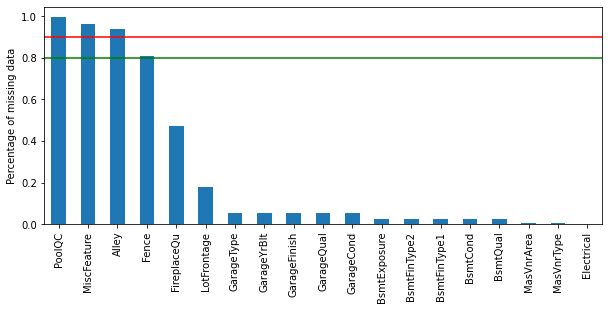

In [16]:
# We can visualize the missing data of the dataset

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [17]:
# How many are categorical and how many are numerical in these missing data?

cat_vars
vars_with_na

cat_missing = [var for var in cat_vars if var in vars_with_na]
num_missing = [var for var in num_vars if var in vars_with_na]

print(len(cat_missing))
print(len(num_missing))

16
3


In [18]:
num_missing

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [19]:
cat_missing

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Relationship between the missing values and the target variable (Sale Price) 


In [20]:
def analyse_na_value(df, var):

    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

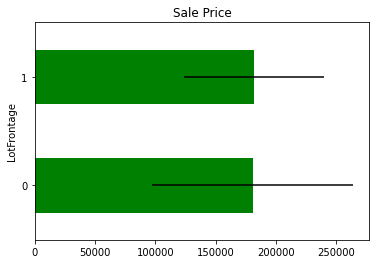

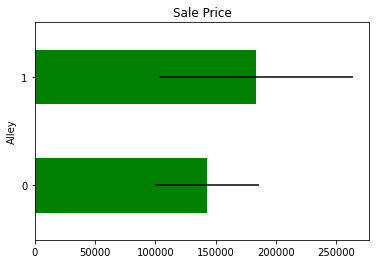

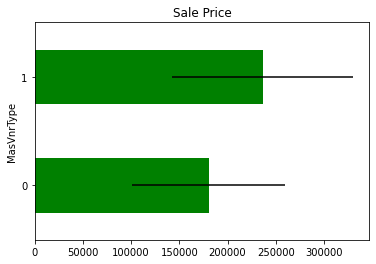

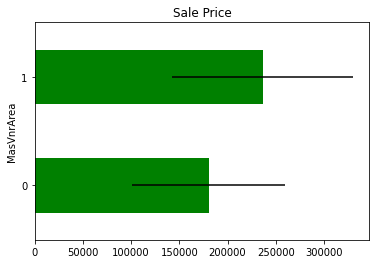

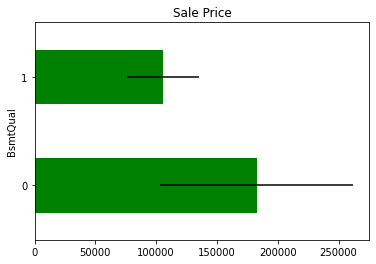

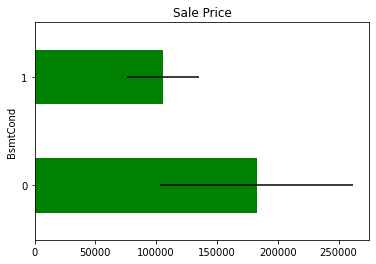

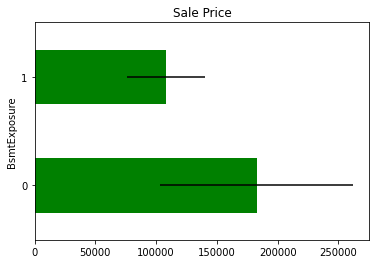

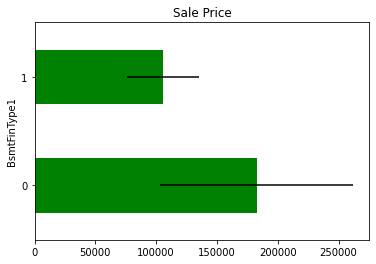

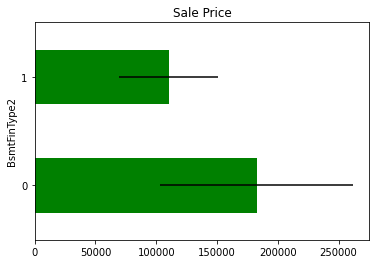

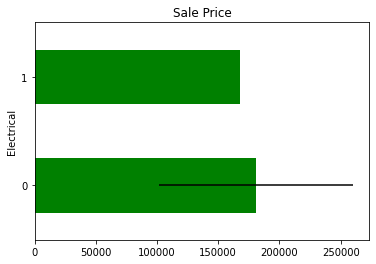

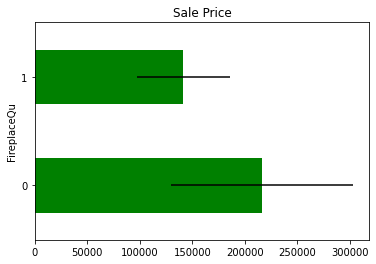

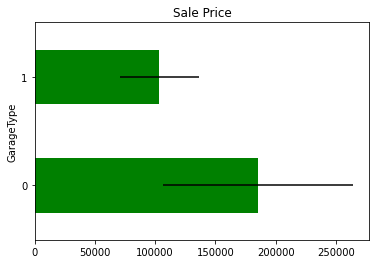

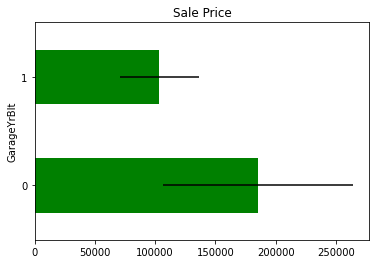

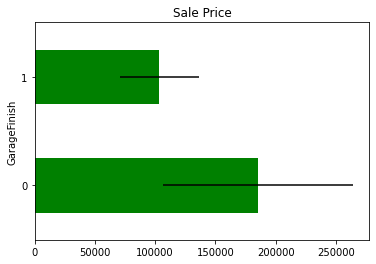

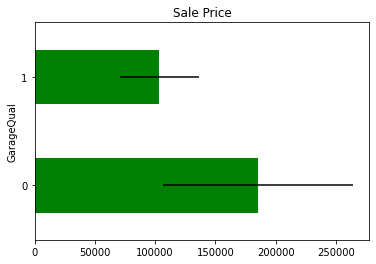

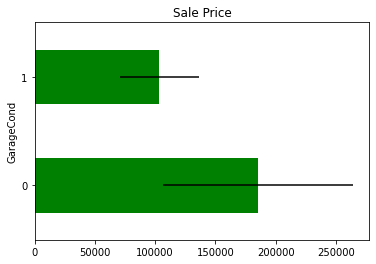

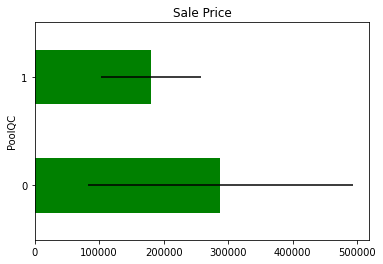

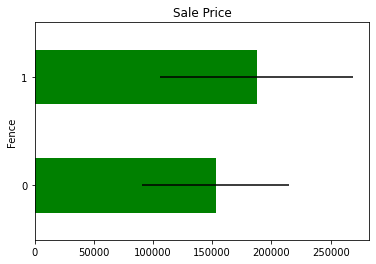

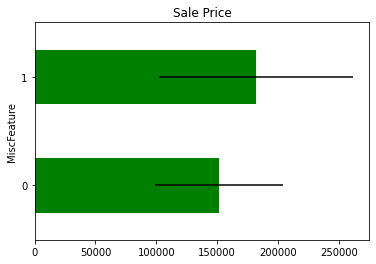

In [21]:
# let's run the function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(data, var)

In some variables, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

# Numerical Variables

In [23]:
print('Number of numerical variables:',len(num_vars))

data[num_vars].head()

Number of numerical variables: 35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


## Temporal variables

We have 4 year variables in the dataset:
*   YearBuilt: year in which the house was built
*   YearRemodAdd: year in which the house was remodeled
*   GarageYrBlt: year in which a garage was built
*   YrSold: year in which the house was sold





In [24]:
# List the variables that contain year 

years_vars = [ var for var in num_vars if "Yr" in var or "Year" in var]
years_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
# Explore all the values in the years variables


for var in years_vars:
  print(var, data[var].unique())
  print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

All the values are in years.

Exploring the evolution of the sale price with the years in which the house was sold:

Text(0, 0.5, 'Median House Price')

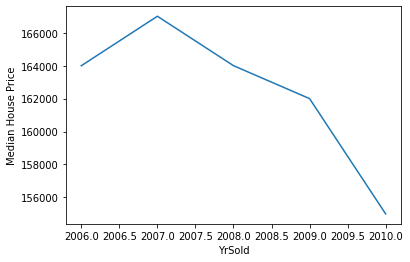

In [44]:
# plot median sale price vs year in which it was sold

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.

Plotting the price of sale vs year in which it was built

Text(0, 0.5, 'Median House Price')

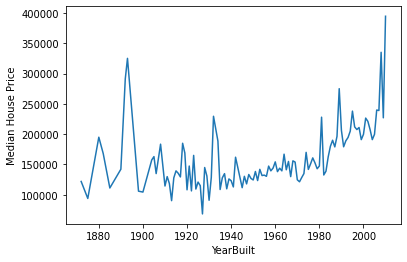

In [45]:
# plot median sale price vs year in which it was built

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

We can see that newly built / younger houses tend to be more expensive.

Could it be that lately older houses were sold? Let's have a look at that.

For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

In [ ]:
def analyse_year_vars(df, var):
  df = df.copy()

  # capture difference between a year variable and year
  # in which the house was sold
  df[var] = df['YrSold'] - df[var]

  df.groupby('YrSold')[var].median().plot()
  plt.ylabel('Time from ' + var)
  plt.show()

for var in years_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)


From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently, that might explain why we see cheaper sales prices in recent years, at least in this dataset.

We can now plot instead the time since last remodelled, or time since built, and sale price, to see if there is a relationship.

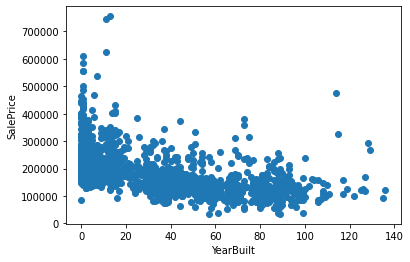

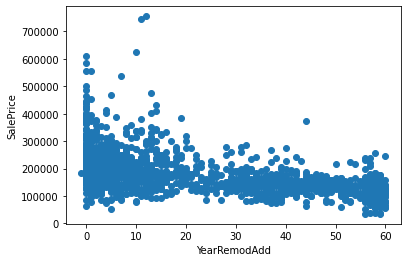

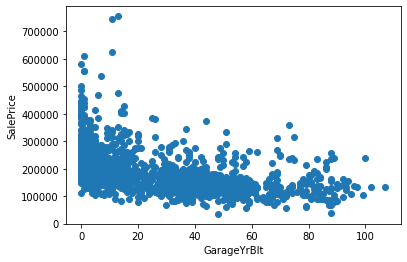

In [48]:
def analyse_year_vars(df, var):
  df = df.copy()

  # capture difference between a year variable and year in which the house was sold
  df[var] = df['YrSold'] - df[var]

  plt.scatter(df[var], df['SalePrice'])
  plt.ylabel('SalePrice')
  plt.xlabel(var)
  plt.show()

for var in years_vars:
  if var != 'YrSold':
    analyse_year_vars(data, var)


We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price.

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.



## Discrete variables
Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [53]:
# List of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) <20 and var not in years_vars]

print('Length of discrete variables: ', len(discrete_vars))

Length of discrete variables:  13


In [54]:
# Visualizing the discrete variables

data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


These discrete variables tend to be qualifications (Qual) or gradign scales (Cond), or refer to the number of rooms, or units (FullBath, GaragCars), or indicate the area od the room (KitchenAbvGr).

We ecpect higer prices, with bigger numbers.

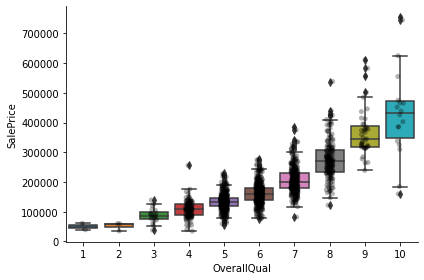

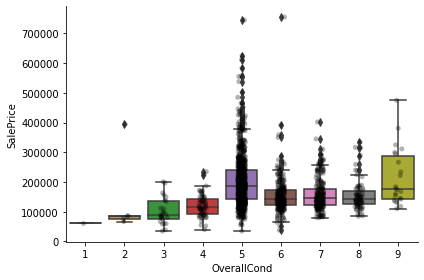

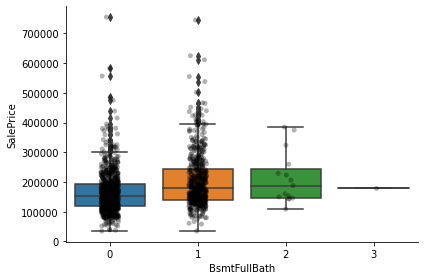

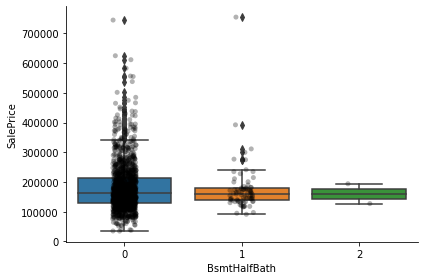

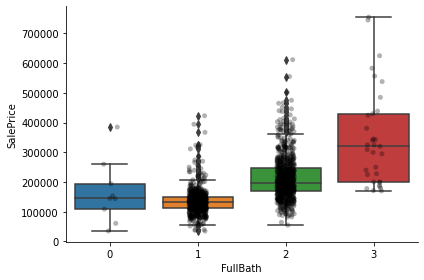

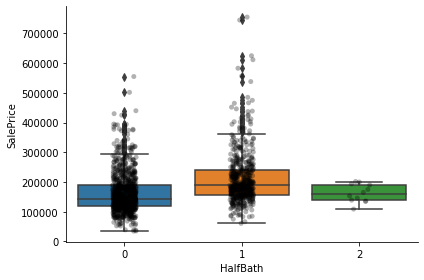

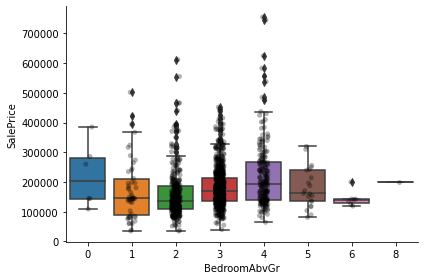

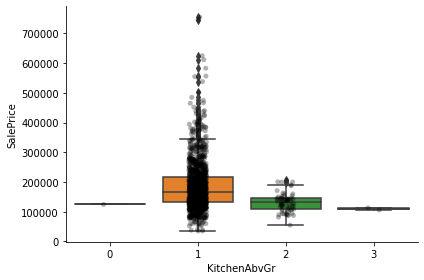

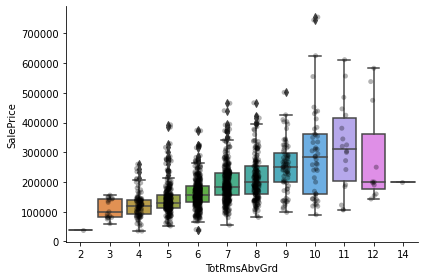

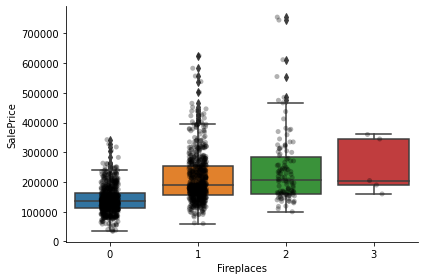

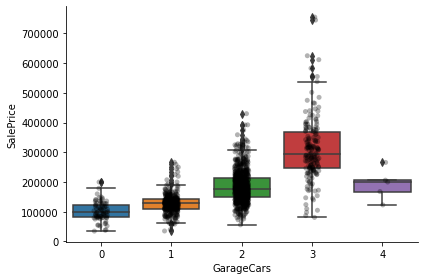

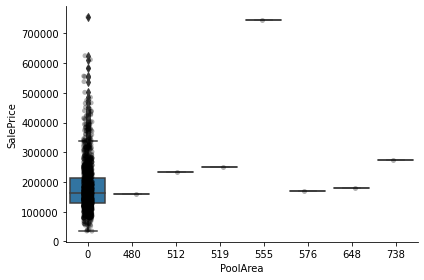

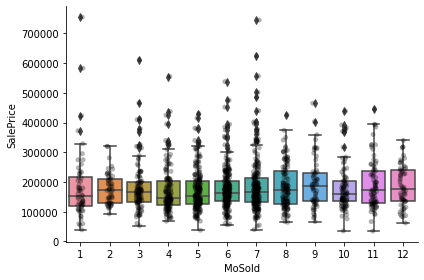

In [55]:
for var in discrete_vars:
  # make boxplot with Catplot
  sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
  # add data points to boxplot with stripplot
  sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
  plt.show()